# Analyze errors with features to calculate error std

- First read error list and features list from txt files.
- Then calculate std of errors with respect to features by binning the features.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

results_path = "results/feature_error.txt"

In [14]:
with open(results_path, "r") as f:
    lines = f.readlines()[1:]

exList = []
eyList = []
errorList = []
pxList = []
pyList = []
distanceList = []
directionList = []
densityList = []
intensityList = []
heightList = []
lengthList = []
widthList = []
volumeList = []
orientationList = []
confidenceList = []
for line in lines:
    data = line.split()
    exList.append(float(data[1]))
    eyList.append(float(data[2]))
    pxList.append(float(data[3]))
    pyList.append(float(data[4]))
    densityList.append(float(data[5]))
    intensityList.append(float(data[6]))
    heightList.append(float(data[7]))
    lengthList.append(float(data[8]))
    widthList.append(float(data[9]))
    orientationList.append(float(data[10]))
    confidenceList.append(float(data[11]))
    distanceList.append(np.sqrt((float(data[3])**2 + float(data[4])**2)))
    directionList.append(np.arctan2(float(data[4]), float(data[3])))
    volumeList.append(float(data[7])*float(data[8])*float(data[9]))
    errorList.append(np.sqrt((float(data[1])**2 + float(data[2])**2)))

In [43]:
def analyzeFeature(featureList, errorList, title, N, index):
    
    fontsize = 15
    plt.subplot(2, N, index)
    plt.hist(featureList, bins=200)
    # plt.title("hist of " + title, fontsize=fontsize)
    plt.xlabel(title, fontsize=fontsize)
    plt.ylabel("count", fontsize=fontsize)

    minNum = 20
    featureList = np.array(featureList)
    errorList = np.array(errorList)
    minBin = np.min(featureList)
    maxBin = np.max(featureList)
    step = (maxBin - minBin) / 200
    bins = np.arange(minBin, maxBin, step)
    stdList = []
    for d in bins:
        mask = (featureList >= d) & (featureList < d+1)
        if mask.sum() > minNum:
            stdList.append(np.std(np.array(errorList)[mask]))
        else:
            stdList.append(0)

    # plot the std of error in each bin
    mask = np.array(stdList) > 0
    plt.subplot(2, N, index + N)
    plt.plot(bins[mask], np.array(stdList)[mask])
    plt.xlabel(title, fontsize=fontsize)
    plt.ylabel("std of error", fontsize=fontsize)
    # plt.title("std of error", fontsize=fontsize)

        ## calculate correlation between feature and std
    featureMasked = bins[mask]
    stdMasked = np.array(stdList)[mask]
    correlation = np.corrcoef(featureMasked, stdMasked)[0, 1]
    print(f"Correlation between {title} and std of error: {correlation}")

Correlation between density and std of error: -0.6233553722037716
Correlation between intensity and std of error: 0.9670498741664335
Correlation between distance and std of error: 0.9500258586686018
Correlation between direction and std of error: -0.03215331784180839
Correlation between volume and std of error: -0.02540346944210578
Correlation between confidence and std of error: -0.8726021389999784


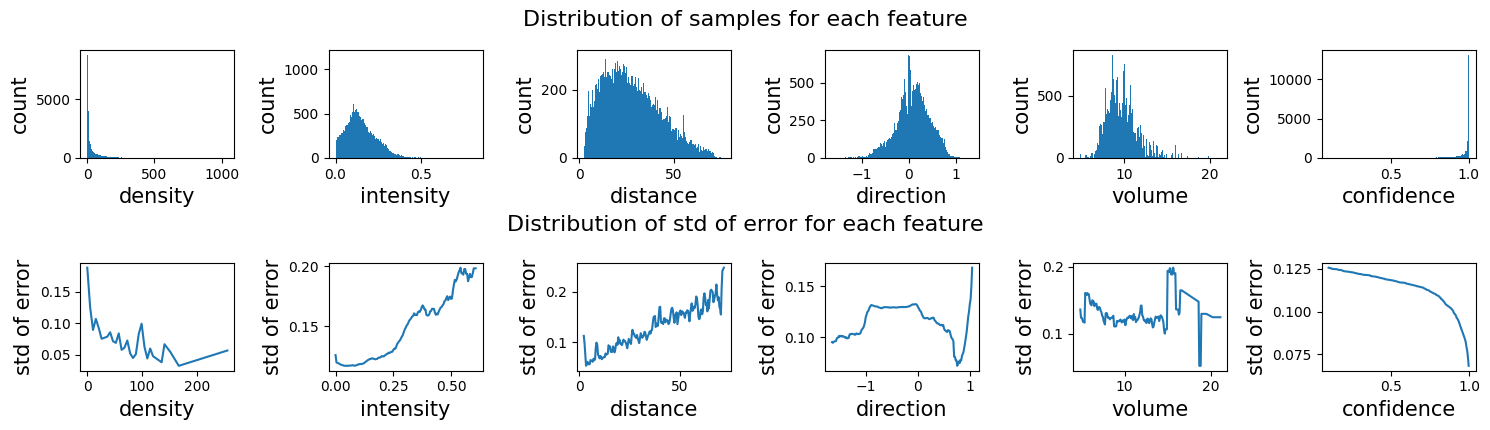

In [ ]:
plt.figure(figsize=(15, 5))
analyzeFeature(densityList, errorList, "density", 6, 1)
analyzeFeature(intensityList, errorList, "intensity", 6, 2)
analyzeFeature(distanceList, errorList, "distance", 6, 3)
analyzeFeature(directionList, errorList, "direction", 6, 4)
analyzeFeature(volumeList, errorList, "volume", 6, 5)
analyzeFeature(confidenceList, errorList, "confidence", 6, 6)

# 获取当前 Figure 和 axes 列表（按创建顺序，前 6 个是第一行，后 6 个是第二行）
fig = plt.gcf()
axes = fig.axes

# 计算行标题的 y 坐标（基于第 1 列的子图位置）
# 注意：axes 索引 0 是第一行第一列，索引 6 是第二行第一列（2x6 布局）
pos_top = axes[0].get_position()
y_top = pos_top.y1 + 0.03  # 第一行标题稍微放在上方

pos_bottom = axes[6].get_position()
y_bottom = pos_bottom.y0 + 0.01  # 第二行标题稍微放在下方（负方向）

# 在 Figure 上居中添加行标题
fig.text(0.5, y_top, "Distribution of samples for each feature", ha='center', va='bottom', fontsize=16)
fig.text(0.5, y_bottom, "Distribution of std of error for each feature", ha='center', va='top', fontsize=16)

# 确保 tight_layout 不把行标题挤掉：留出上方和下方空间
plt.tight_layout(rect=[0, 0.1, 1, 0.9], h_pad=4.0)  # rect 留出上下边距，h_pad 增大行间距

plt.savefig('images/feature_std_analysis.png', dpi=300)
plt.show()  # 显示图形  

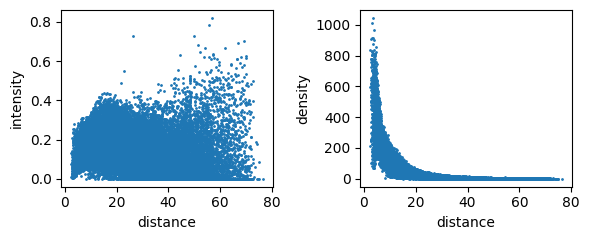

SROCC (distance vs intensity): -0.1962
SROCC (distance vs density): -0.9261
SROCC (intensity vs density): 0.2529


In [ ]:
# hist of distance
plt.figure(figsize=(6, 2.5))
plt.subplot(1, 2, 1)
plt.plot(distanceList, intensityList, "o", markersize=1)
plt.xlabel("distance")
plt.ylabel("intensity")
plt.subplot(1, 2, 2)
plt.plot(distanceList, densityList, "o", markersize=1)
plt.xlabel("distance")
plt.ylabel("density")
plt.tight_layout()  # 自动调整子图间的间距
plt.savefig('images/distance_intensity_density.png', dpi=300)
plt.show()

# calculate SROCC of each 2 of distanceList, intensityList and densityList
def rankdata(a):
    a = np.asarray(a)
    n = a.size
    order = np.argsort(a)
    ranks = np.empty(n, dtype=float)
    ranks[order] = np.arange(1, n+1)  # 1-based ranks
    sorted_a = a[order]
    i = 0
    while i < n:
        j = i + 1
        while j < n and sorted_a[j] == sorted_a[i]:
            j += 1
        if j - i > 1:
            avg = (i + 1 + j) / 2.0  # average of 1-based positions
            ranks[order[i:j]] = avg
        i = j
    return ranks

def spearmanr(x, y):
    rx = rankdata(x)
    ry = rankdata(y)
    mx, my = rx.mean(), ry.mean()
    num = np.sum((rx - mx) * (ry - my))
    den = np.sqrt(np.sum((rx - mx) ** 2) * np.sum((ry - my) ** 2))
    return np.nan if den == 0 else num / den

# calculate SROCC of each pair among distanceList, intensityList and densityList
pairs = [
    ("distance", "intensity", distanceList, intensityList),
    ("distance", "density",  distanceList, densityList),
    ("intensity", "density", intensityList, densityList),
]

for a_name, b_name, a, b in pairs:
    corr = spearmanr(a, b)
    print(f"SROCC ({a_name} vs {b_name}): {corr:.4f}")


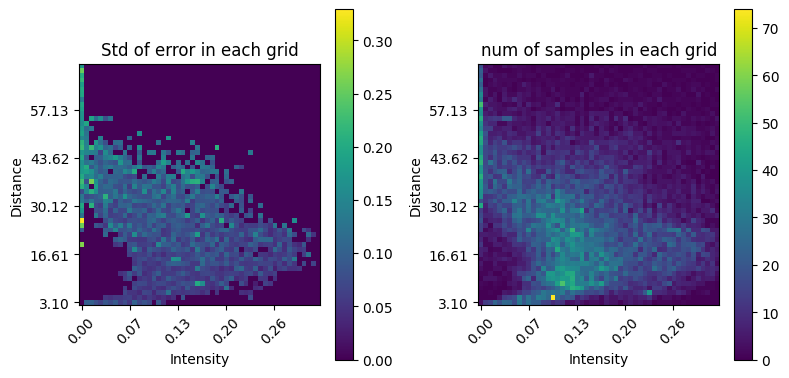

stepDistance:  1.350549308822723
stepIntensity:  0.006559999999999999
num of zero std grid:  1005
num of total grid:  2500


In [ ]:
# choose distance and intensity as features
N1 = 100
N2 = 50
minNumData = 10
maxBinDistance = max(distanceList)
minBinDistance = min(distanceList)
stepDistance = (maxBinDistance - minBinDistance) / N1
binsDistance = np.arange(minBinDistance, maxBinDistance, stepDistance)
maxBinIntensity = max(intensityList)
minBinIntensity = min(intensityList)
stepIntensity = (maxBinIntensity - minBinIntensity) / N1
binsIntensity = np.arange(minBinIntensity, maxBinIntensity, stepIntensity)
errorListGrid = [[[] for _ in range(len(binsIntensity))] for _ in range(len(binsDistance))]
numGrid = np.zeros((len(binsDistance), len(binsIntensity)))
stdGrid = np.zeros((len(binsDistance), len(binsIntensity)))
for i in range(len(distanceList)):
    indexDistance = int((distanceList[i] - minBinDistance) / stepDistance)
    indexIntensity = int((intensityList[i] - minBinIntensity) / stepIntensity)
    if 0 <= indexDistance < len(binsDistance) and 0 <= indexIntensity < len(binsIntensity):
        errorListGrid[indexDistance][indexIntensity].append(errorList[i])
        numGrid[indexDistance, indexIntensity] += 1
for i in range(len(binsDistance)):
    for j in range(len(binsIntensity)):
        if numGrid[i, j] > minNumData:
            stdGrid[i, j] = np.std(errorListGrid[i][j])
        else:
            stdGrid[i, j] = 0
mask = stdGrid > 0

# adjust maxBin and minBin
maxBinDistance = max(binsDistance[mask.any(axis=1)])
minBinDistance = min(binsDistance[mask.any(axis=1)])
maxBinIntensity = max(binsIntensity[mask.any(axis=0)])
minBinIntensity = min(binsIntensity[mask.any(axis=0)])
stepDistance = (maxBinDistance - minBinDistance) / N2
stepIntensity = (maxBinIntensity - minBinIntensity) / N2
binsDistance = np.arange(minBinDistance, maxBinDistance, stepDistance)
binsIntensity = np.arange(minBinIntensity, maxBinIntensity, stepIntensity)
numGrid = np.zeros((len(binsDistance), len(binsIntensity)))
stdGrid = np.zeros((len(binsDistance), len(binsIntensity)))
for i in range(len(distanceList)):
    indexDistance = int((distanceList[i] - minBinDistance) / stepDistance)
    indexIntensity = int((intensityList[i] - minBinIntensity) / stepIntensity)
    if 0 <= indexDistance < len(binsDistance) and 0 <= indexIntensity < len(binsIntensity):
        errorListGrid[indexDistance][indexIntensity].append(errorList[i])
        numGrid[indexDistance, indexIntensity] += 1
for i in range(len(binsDistance)):
    for j in range(len(binsIntensity)):
        if numGrid[i, j] > minNumData:
            stdGrid[i, j] = np.std(errorListGrid[i][j])
        else:
            stdGrid[i, j] = 0
mask = stdGrid > 0

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)  
plt.imshow(stdGrid, interpolation='nearest', origin='lower')  
plt.colorbar()  
plt.title("Std of error in each grid")  
plt.xlabel("Intensity")  
plt.ylabel("Distance")  
plt.xticks(range(len(binsIntensity))[::10], ["{:.2f}".format(x) for x in binsIntensity[::10]], rotation=45)  
plt.yticks(range(len(binsDistance))[::10], ["{:.2f}".format(x) for x in binsDistance[::10]])  

plt.subplot(1, 2, 2)
plt.imshow(numGrid, interpolation='nearest', origin='lower')
plt.colorbar()
plt.title("num of samples in each grid")
plt.xlabel("Intensity")
plt.ylabel("Distance")
plt.xticks(range(len(binsIntensity))[::10], ["{:.2f}".format(x) for x in binsIntensity[::10]], rotation=45)
plt.yticks(range(len(binsDistance))[::10], ["{:.2f}".format(x) for x in binsDistance[::10]])

plt.tight_layout()
plt.savefig('images/std_num_heatmap.png', dpi=300)
plt.show()

numNonZeroGrid = np.sum(mask)
print("stepDistance: ", stepDistance)
print("stepIntensity: ", stepIntensity)
print("num of zero std grid: ", numNonZeroGrid)
print("num of total grid: ", len(binsDistance)*len(binsIntensity))


In [ ]:
# save the grid data
results_feature_grid_path = "results/feature_std.txt"
with open(results_feature_grid_path, "w") as f:
    f.write("stepDistance: " + str(stepDistance) + "\n")
    f.write("stepIntensity: " + str(stepIntensity) + "\n")
    f.write("num of zero std grid: " + str(numNonZeroGrid) + "\n")
    f.write("num of total grid: " + str(len(binsDistance)*len(binsIntensity)) + "\n")
    f.write("maxDistance: " + str(maxBinDistance) + "\n")
    f.write("minDistance: " + str(minBinDistance) + "\n")
    f.write("maxIntensity: " + str(maxBinIntensity) + "\n")
    f.write("minIntensity: " + str(minBinIntensity) + "\n")
    f.write("distance\tintensity\tstd\n")
    for i in range(len(binsDistance)):
        for j in range(len(binsIntensity)):
            if mask[i, j]:
                f.write(f"{binsDistance[i]+stepDistance/2:.04f}\t\t{binsIntensity[j]+stepIntensity/2:.04f}\t\t{stdGrid[i, j]:.04f}\n")



In [ ]:
# save error, distance, intensity and std
results_feature_error_path = "results/feature_error_std.txt"
with open(results_feature_error_path, "w") as f:
    f.write("error_x\t\terror_y\t\tpx\t\t\tpy\t\t\tdensity\t\tintensity\tstd\n")
    for i in range(len(distanceList)):
        indexDistance = int((distanceList[i] - minBinDistance) / stepDistance)
        indexIntensity = int((intensityList[i] - minBinIntensity) / stepIntensity)
        if 0 <= indexDistance < len(binsDistance) and 0 <= indexIntensity < len(binsIntensity):
            if stdGrid[indexDistance, indexIntensity] > 0:
                f.write(f"{exList[i]:.03f}\t\t{eyList[i]:.03f}\t\t{pxList[i]:.03f}\t\t{pyList[i]:.03f}\t\t{densityList[i]:.03f}\t\t{intensityList[i]:.03f}\t\t{stdGrid[indexDistance, indexIntensity]:.03f}\n")